In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *
from idea import dynamic_IDEA

In [2]:
random_state("rng_states/experiment5.npy")

In [3]:
S = [1.] * 12
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 12

rectangles = [((i - 0.25, 5), (i + 1.25, 7)) for i in range(-9, 10, 2)] + [((i - 0.25, 2), (i + 1.25, 3)) for i in range(-9, 10, 2)]
rectangle_vs = [(-0.4, 0)] * (len(rectangles) // 2) + [(0.4, 0)] * (len(rectangles) // 2)
target = (3., 8.5)
target_v = (-0.5, -0.1)
targets = target_with_velocity(target, target_v, T)
rectangle_lists = rectangles_with_velocity(rectangles, rectangle_vs, T)
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangles)

n = 600
alpha_inf = 0.8
n_immigrants = 100
eta_c = 3.
eta_m = 20.
p_c = 0.9
p_m = 0.05
num_iterations_init = 160
num_iterations = 120

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

t=0


/home/i291318/Dynamic-inverse-kinematics/simulation.py:34: RuntimeWarning: divide by zero encountered in true_divide
  t = _vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:35: RuntimeWarning: divide by zero encountered in true_divide
  u = _vector_product(x2 - x1, d1) / rs


Iteration 0, #feasible: 120, best: [20.56950766], #infeasible: 480, best: [3.3628115 1.       ]
Iteration 20, #feasible: 120, best: [2.76705525], #infeasible: 480, best: [0.00297235 1.        ]
Iteration 40, #feasible: 120, best: [0.00794826], #infeasible: 480, best: [2.23973435e-05 1.00000000e+00]
Iteration 60, #feasible: 120, best: [0.00027853], #infeasible: 480, best: [2.14819298e-05 1.00000000e+00]
Iteration 80, #feasible: 120, best: [3.6241198e-05], #infeasible: 480, best: [4.73049922e-06 1.00000000e+00]
Iteration 100, #feasible: 120, best: [3.6241198e-05], #infeasible: 480, best: [1.8429134e-06 1.0000000e+00]
Iteration 120, #feasible: 120, best: [3.6241198e-05], #infeasible: 480, best: [2.45115046e-07 1.00000000e+00]
Iteration 140, #feasible: 120, best: [1.15889638e-05], #infeasible: 480, best: [4.6488178e-08 1.0000000e+00]
Iteration 159, #feasible: 120, best: [1.27396551e-06], #infeasible: 480, best: [3.90375004e-08 1.00000000e+00]
t=1
Iteration 0, #feasible: 120, best: [45.3241

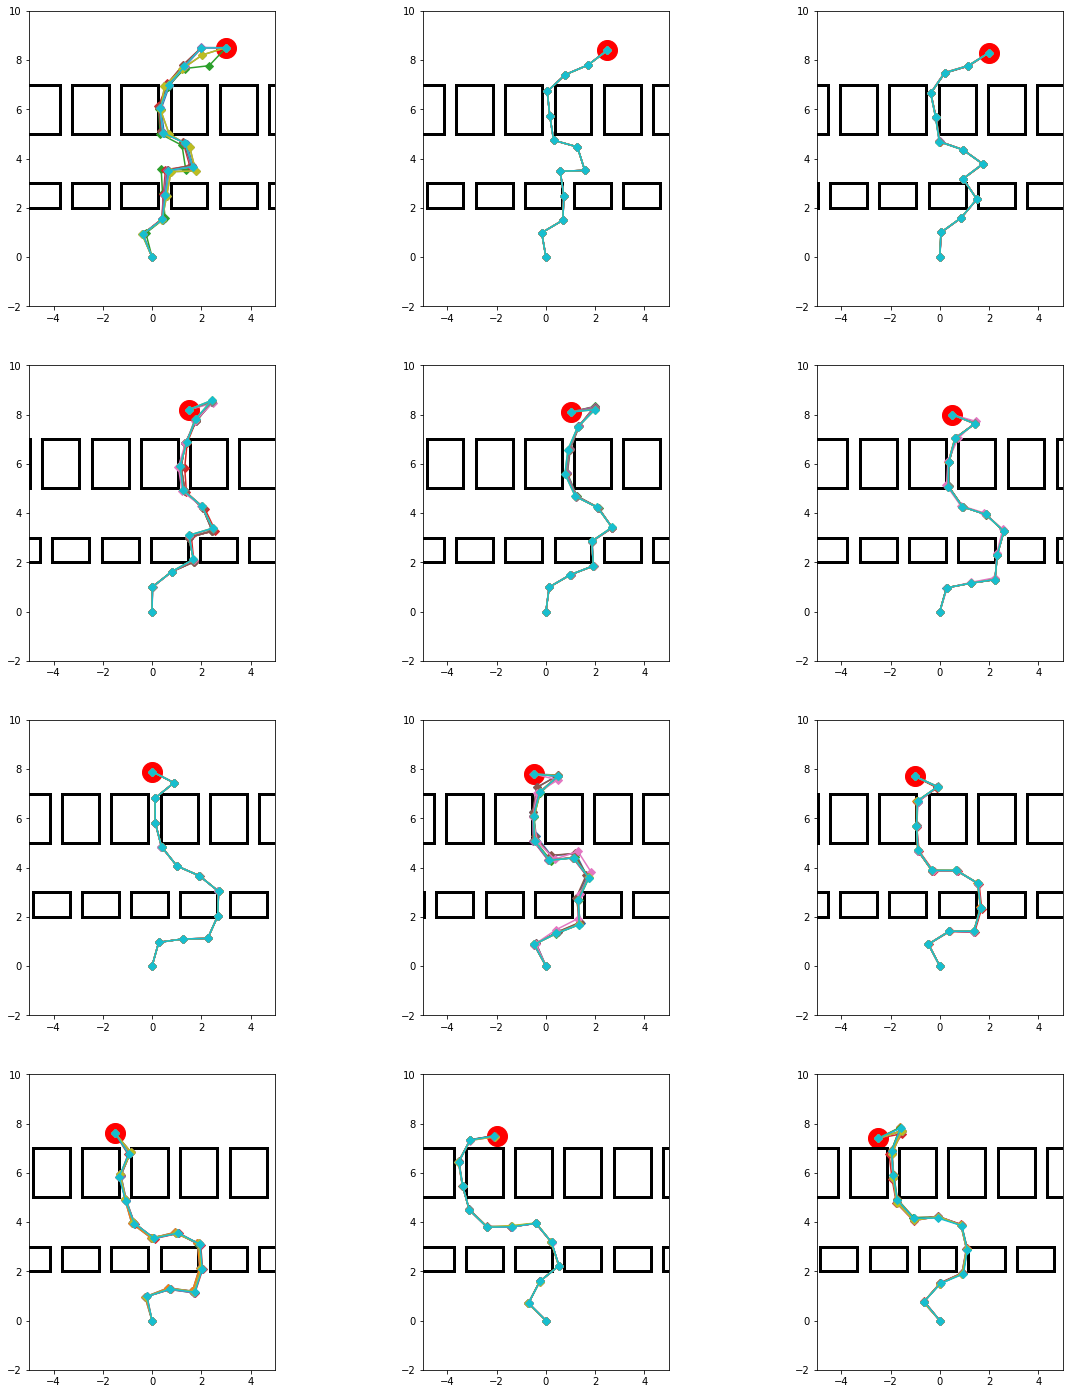

In [4]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    best = np.argsort(scores[-1, mask, 0])[:10]
    feasible_populations.append(feasible_population[best])
    
draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 10))

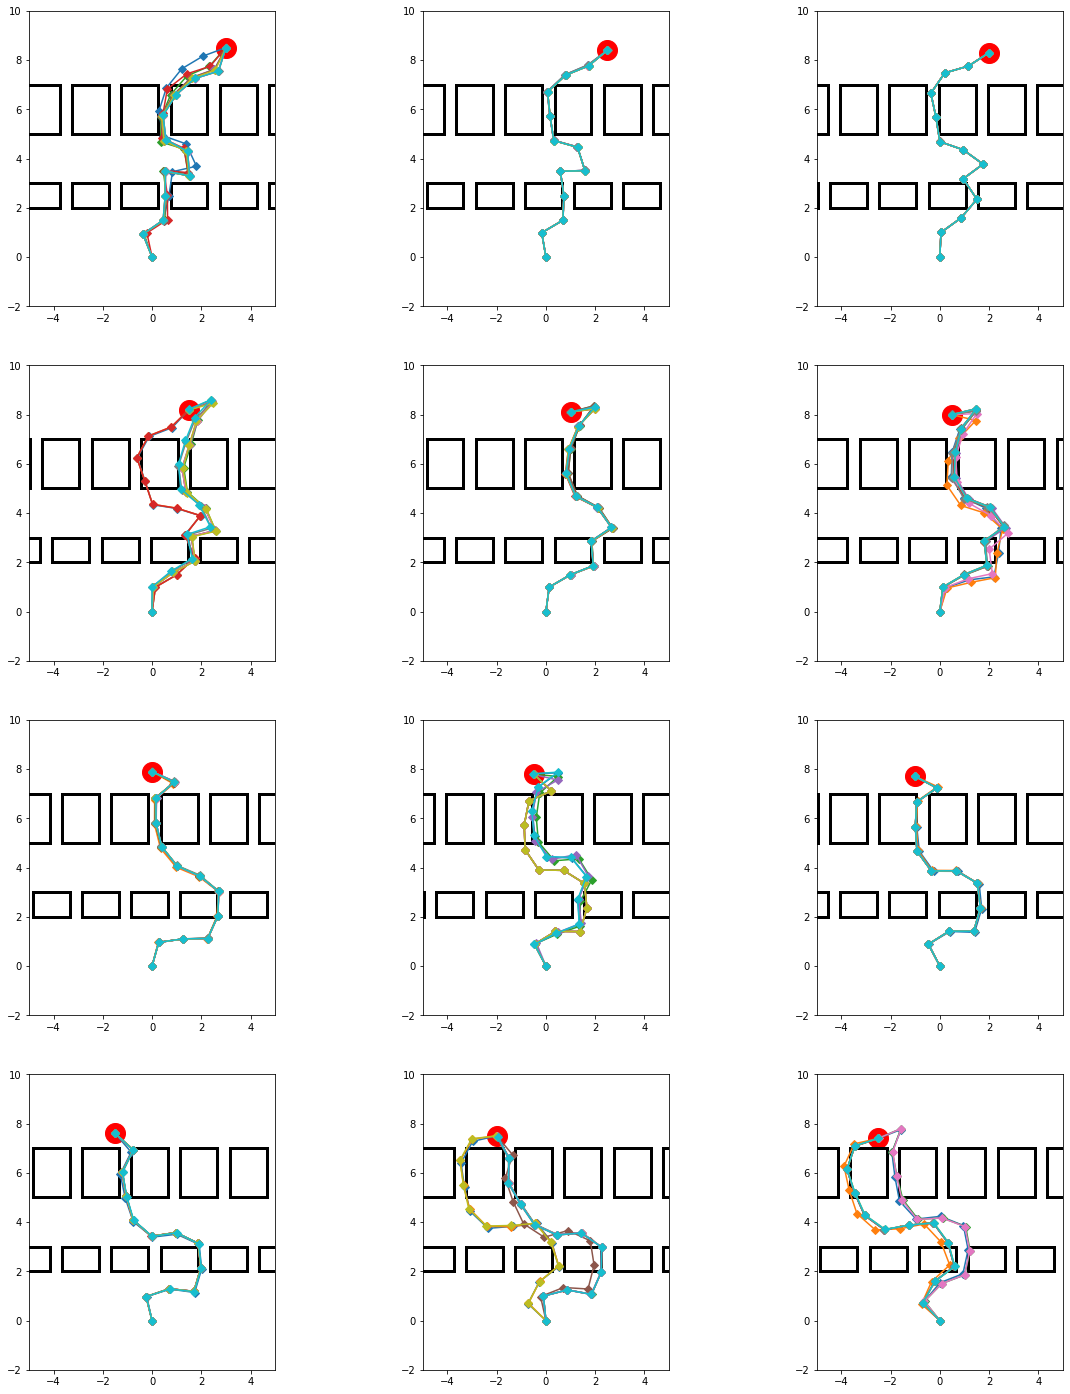

In [5]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population[::sum(~mask) // 10])
    
draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 10))


In [6]:
random_state("rng_states/experiment5.npy")

In [7]:
S = [1.] * 12
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 12

rectangles = [((i - 0.25, 5), (i + 1.25, 7)) for i in range(-9, 10, 2)] + [((i - 0.25, 2), (i + 1.25, 3)) for i in range(-9, 10, 2)]
rectangle_vs = [(-0.4, 0)] * (len(rectangles) // 2) + [(0.4, 0)] * (len(rectangles) // 2)
target = (3., 8.5)
target_v = (-0.5, -0.1)
targets = target_with_velocity(target, target_v, T)
rectangle_lists = rectangles_with_velocity(rectangles, rectangle_vs, T)
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangles)

n = 600
alpha_inf = 0.8
n_immigrants = 100
eta_c = 3.
eta_m = 20.
p_c = 0.9
p_m = np.geomspace(0.02, 0.2, d)
num_iterations_init = 160
num_iterations = 120

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

t=0


/home/i291318/Dynamic-inverse-kinematics/simulation.py:34: RuntimeWarning: divide by zero encountered in true_divide
  t = _vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:35: RuntimeWarning: divide by zero encountered in true_divide
  u = _vector_product(x2 - x1, d1) / rs


Iteration 0, #feasible: 120, best: [20.56950766], #infeasible: 480, best: [3.32866264 1.        ]
Iteration 20, #feasible: 120, best: [0.09056233], #infeasible: 480, best: [9.07590835e-04 1.00000000e+00]
Iteration 40, #feasible: 120, best: [0.00030309], #infeasible: 480, best: [5.81889197e-05 1.00000000e+00]
Iteration 60, #feasible: 120, best: [1.16389624e-05], #infeasible: 480, best: [2.38452947e-06 1.00000000e+00]
Iteration 80, #feasible: 120, best: [2.31445095e-06], #infeasible: 480, best: [1.04410684e-06 1.00000000e+00]
Iteration 100, #feasible: 120, best: [2.31445095e-06], #infeasible: 480, best: [1.04410684e-06 1.00000000e+00]
Iteration 120, #feasible: 120, best: [2.31445095e-06], #infeasible: 480, best: [5.44177779e-08 1.00000000e+00]
Iteration 140, #feasible: 120, best: [2.31445095e-06], #infeasible: 480, best: [2.00618311e-08 1.00000000e+00]
Iteration 159, #feasible: 120, best: [2.31445095e-06], #infeasible: 480, best: [2.00618311e-08 1.00000000e+00]
t=1
Iteration 0, #feasible

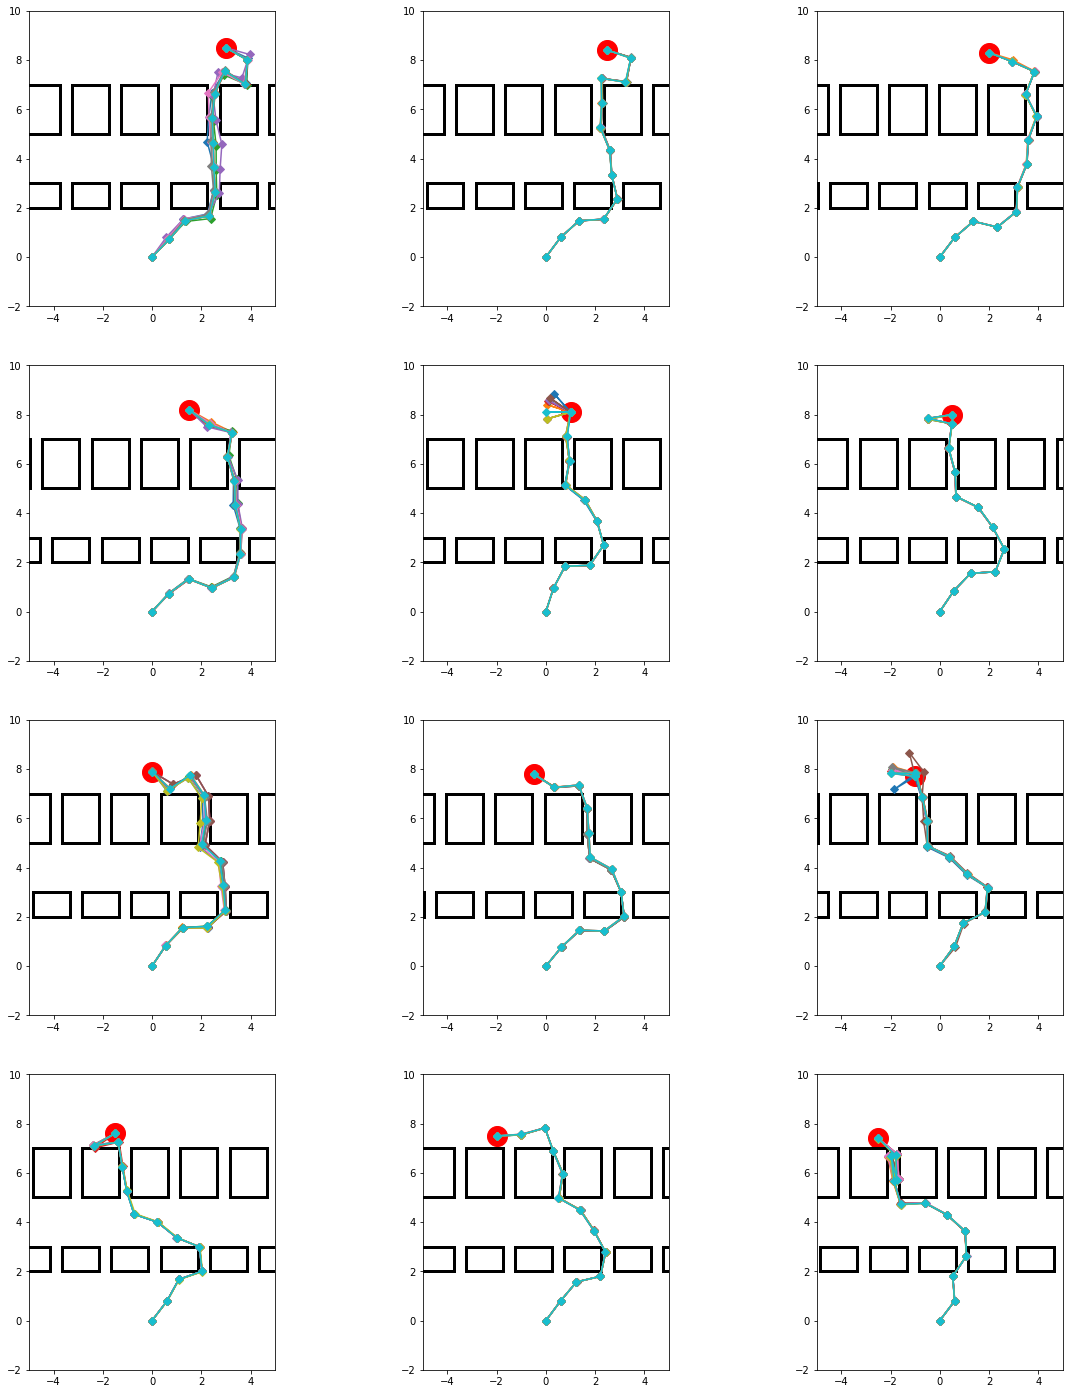

In [8]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    best = np.argsort(scores[-1, mask, 0])[:10]
    feasible_populations.append(feasible_population[best])
    
draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 10))

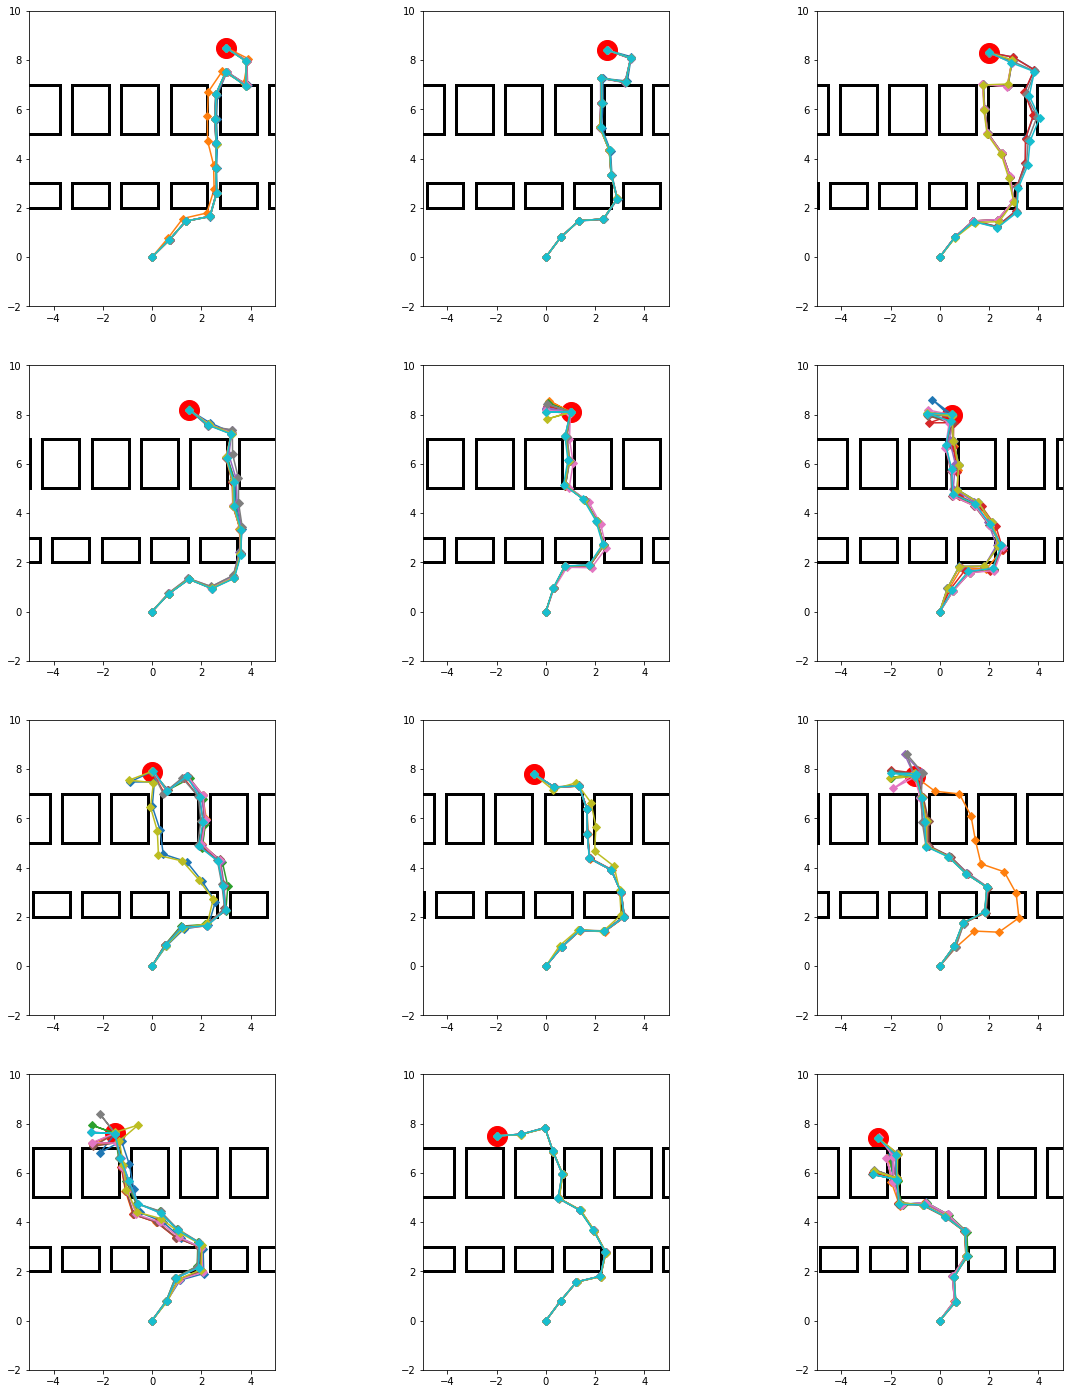

In [9]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population[::sum(~mask) // 10])
    
draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25), xlim=(-5, 5), ylim=(-2, 10))
